In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

data = pd.read_csv('Admission_Predict.csv')

In [121]:
data = data.rename(str.strip, axis='columns')
x = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [44]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=456)

[0.62887035 0.6281431  0.68811839 0.53325018 0.72964752]
0.7153682771458336
--- 0.042001962661743164 seconds ---


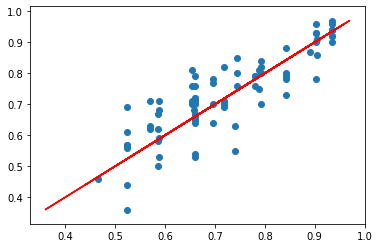

In [122]:
from sklearn.tree import DecisionTreeRegressor
import time
start_time = time.time()

dtr = DecisionTreeRegressor(random_state=456, max_depth=5, min_samples_split=20, max_features=3) 
dtr.fit(x_train, y_train)
prediction = dtr.predict(x_test)

plt.scatter(prediction, y_test)
plt.plot(y_test, y_test, c='r')

print(cross_val_score(dtr, x_train, y_train, cv=5))
print(dtr.score(x_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.74879537 0.8355682  0.75872483 0.78754511 0.83837037]
0.7989717113786343
--- 0.08196187019348145 seconds ---


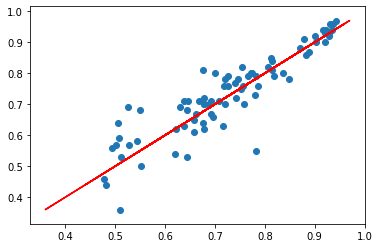

In [123]:
from sklearn import ensemble
import time
start_time = time.time()

rfr = ensemble.RandomForestRegressor(random_state=456, max_depth=10, min_samples_split=20,  max_features=3)
rfr.fit(x_train, y_train)
prediction1 = rfr.predict(x_test)

plt.scatter(prediction1, y_test)
plt.plot(y_test, y_test, c='r')

print(cross_val_score(rfr, x_train, y_train, cv=5))
print(rfr.score(x_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))


using random forest tree did take longer time for running the simulation, also the accuracy of prediction on the test samples 
seems increased 10% after using the random forest